
# Homework 4


Some initializations

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql

pd.set_option('display.max_columns', 220) # to see all columns 
pd.options.mode.copy_on_write = True # to avoid warnings when replacing values in a column and other commands
# see https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html#copy-on-write-chained-assignment


## Joining data



#### Loading data


In [2]:
cleaned_cell_phones_total_df = pd.read_csv('cleaned_cell_phones_total.csv', index_col='iso-3')

In [3]:
country_data_df = pd.read_csv("country_data.csv", index_col='alpha-3')

In [4]:
pop_data_df = pd.read_csv('pop_data.csv', index_col='iso-3')


#### Structure of data


Cell phones

In [5]:
cleaned_cell_phones_total_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, ABW to ZWE
Data columns (total 56 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    214 non-null    float64
 1   1965    214 non-null    float64
 2   1966    214 non-null    float64
 3   1967    214 non-null    float64
 4   1968    214 non-null    float64
 5   1969    214 non-null    float64
 6   1970    214 non-null    float64
 7   1971    214 non-null    float64
 8   1972    214 non-null    float64
 9   1973    214 non-null    float64
 10  1974    214 non-null    float64
 11  1975    214 non-null    float64
 12  1976    214 non-null    float64
 13  1977    214 non-null    float64
 14  1978    214 non-null    float64
 15  1979    214 non-null    float64
 16  1980    214 non-null    float64
 17  1981    214 non-null    float64
 18  1982    214 non-null    float64
 19  1983    214 non-null    float64
 20  1984    214 non-null    float64
 21  1985    214 non-null    float64
 22  1986 

In [6]:
cleaned_cell_phones_total_df.index.name

'iso-3'

Countries

In [7]:
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, AFG to ZWE
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    object 
 1   alpha-2                   248 non-null    object 
 2   country-code              249 non-null    int64  
 3   iso_3166-2                249 non-null    object 
 4   region                    248 non-null    object 
 5   sub-region                248 non-null    object 
 6   intermediate-region       107 non-null    object 
 7   region-code               248 non-null    float64
 8   sub-region-code           248 non-null    float64
 9   intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 21.4+ KB


In [8]:
country_data_df.index.name

'alpha-3'

In [9]:
print(country_data_df.duplicated().sum()) # are there any duplicates

0


In [10]:
country_data_df.head()

,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
alpha-3,,,,,,,,,,
AFG,Afghanistan,AF,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
ALA,Åland Islands,AX,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
ALB,Albania,AL,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
DZA,Algeria,DZ,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
ASM,American Samoa,AS,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


Populations

In [11]:
pop_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, ABW to ZWE
Data columns (total 62 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  266 non-null    int64  
 1   1960        264 non-null    float64
 2   1961        264 non-null    float64
 3   1962        264 non-null    float64
 4   1963        264 non-null    float64
 5   1964        264 non-null    float64
 6   1965        264 non-null    float64
 7   1966        264 non-null    float64
 8   1967        264 non-null    float64
 9   1968        264 non-null    float64
 10  1969        264 non-null    float64
 11  1970        264 non-null    float64
 12  1971        264 non-null    float64
 13  1972        264 non-null    float64
 14  1973        264 non-null    float64
 15  1974        264 non-null    float64
 16  1975        264 non-null    float64
 17  1976        264 non-null    float64
 18  1977        264 non-null    float64
 19  1978        264 non-null    floa

In [12]:
pop_data_df.index.name

'iso-3'

In [13]:
print(pop_data_df.duplicated().sum())

0


In [14]:
pop_data_df.tail()

,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
iso-3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
XKX,261,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0
YEM,262,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,6228430.0,6368014.0,6515904.0,6673981.0,6843607.0,7024196.0,7215835.0,7417736.0,7630190.0,7855657.0,8094985.0,8348182.0,8615301.0,8899922.0,9204938.0,9529105.0,9872292.0,10237391.0,10625687.0,11036918.0,11465444.0,11915563.0,12387238.0,12872362.0,13375121.0,13895851.0,14433771.0,14988047.0,15553171.0,16103339.0,16614326.0,17108681.0,17608133.0,18114552.0,18628700.0,19143457.0,19660653.0,20188799.0,20733406.0,21320671.0,21966298.0,22641538.0,23329004.0,24029589.0,24743946.0,25475610.0,26223391.0,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0
ZAF,263,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,19789771.0,20410677.0,21050540.0,21704214.0,22368306.0,23031441.0,23698507.0,24382513.0,25077016.0,25777964.0,26480300.0,27199838.0,27943445.0,28697014.0,29463549.0,30232561.0,31022417.0,31865176.0,32768207.0,33752964.0,34877834.0,36119333.0,37393853.0,38668684.0,39877570.0,40910959.0,41760755.0,42525440.0,43267982.0,43986084.0,44661603.0,45285048.0,45852166.0,46364681.0,46813266.0,47229714.0,47661514.0,48104048.0,48556071.0,49017147.0,49491756.0,49996094.0,50565812.0,51170779.0,51784921.0,52443325.0,53145033.0,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0
ZMB,264,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,3777680.0,3901288.0,4029173.0,4159007.0,4281671.0,4399919.0,4523581.0,4653289.0,4789038.0,4931249.0,5079672.0,5233292.0,5391355.0,5553462.0,5720438.0,5897481.0,6090818.0,6291070.0,6488072.0,6686449.0,6890967.0,7095185.0,7294325.0,7491275.0,7686401.0,7880466.0,8074337.0,8270917.0,8474216.0,8684135.0,8902019.0,9133156.0,9372430.0,9621238.0,9891136.0,10191964.0,10508294.0,10837973.0,11188040.0,11564870.0,11971567.0,12402073.0,12852966.0,13318087.0,13792086.0,14265814.0,14744658.0,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0
ZWE,265,3806310.0,3925952.0,4049778.0,4177931.0,4310332.0,4447149.0,4588529.0,4734694.0,4886347.0,5044163.0,5202918.0,5363423.0,5532842.0,5712712.0,5903530.0,6097083.0,6288387.0,6453044.0,6549349.0,6655833.0,7049926.0,7506526.0,7803855.0,8106356.0,8398567.0,8690515.0,8983044.0,9277488.0,9568739.0,9846346.0,10113893.0,10377815.0,10641501.0,10794918.0,10858594.0,10994041.0,11178171.0,11362401.0,11548364.0,11716454.0,11834676.0,11910978.0,11984644.0,12075828.0,12160881.0,12224753.0,12330490.0,12450568.0,12550347.0,12679810.0,12839771.0,13025785.0,13265331.0,13555422.0,13855753.0,14154937.0,14452704.0,14751101.0,15052184.0,15354608.0,15669666.0



#### Cleaning data


We know that the data in **cleaned_cell_phones_total_df** is cleaned already.

In **country_data_df** there are many null values. To save a lot of work and time, it would be good to only clean data that will be needed to solve the assignment. It seems that only the index **alpha-3** and **name** column will be used. The column has no null values, but its Dtype is object. Converting this to Dtype string would be beneficial.

First, make a deep copy of country_data_df.

In [15]:
name_strings_country_data_df = country_data_df.copy()

Now, convert the values in the name column to strings.

In [16]:
name_strings_country_data_df['name'] = country_data_df['name'].astype("string")

In [17]:
name_strings_country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, AFG to ZWE
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      249 non-null    string 
 1   alpha-2                   248 non-null    object 
 2   country-code              249 non-null    int64  
 3   iso_3166-2                249 non-null    object 
 4   region                    248 non-null    object 
 5   sub-region                248 non-null    object 
 6   intermediate-region       107 non-null    object 
 7   region-code               248 non-null    float64
 8   sub-region-code           248 non-null    float64
 9   intermediate-region-code  107 non-null    float64
dtypes: float64(3), int64(1), object(5), string(1)
memory usage: 21.4+ KB


In **pop_data_df** there is a column we don´t need, so we drop it.

In [18]:
dropped_pop_data_df = pop_data_df.drop(columns='Unnamed: 0')


#### Merge dataframes


To create the first table in the assignment we can join, merge, cleaned_cell_phones_total_df and dropped_pop_data_df. Since there are fewer countries 
in cleaned_cell_phones_total_df, 214, than in dropped_pop_data_df, 266, we will make an inner join that only includes the countries where we have data 
both on the number of cellphones and the sizes of the populations. 

There are also data for fewer years in cleaned_cell_phones_total_df, 56, than in dropped_pop_data_df, 61, which also motivates an inner join.

For every year in dropped_pop_data_df there is one or two countries that have no value. It is first after the join that we can find out if some of the included countries is affected by missing values.

To get the right format for the first table we have to make multi-indices, 'iso-3' and 'year', on both dataframes.

In [19]:
stacked_cleaned_cell_phones_total_df = cleaned_cell_phones_total_df.stack()

In [20]:
stacked_cleaned_cell_phones_total_df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 11984 entries, ('ABW', '1960') to ('ZWE', '2019')
Series name: None
Non-Null Count  Dtype  
--------------  -----  
11984 non-null  float64
dtypes: float64(1)
memory usage: 141.1+ KB


In [21]:
stacked_cleaned_cell_phones_total_df.index.names = ['iso-3', 'year']

In [22]:
stacked_cleaned_cell_phones_total_df.tail()

iso-3  year
ZWE    2015    12800000.0
       2016    12900000.0
       2017    14100000.0
       2018    12900000.0
       2019    13200000.0
dtype: float64

In [23]:
stacked_dropped_pop_data_df = dropped_pop_data_df.stack()

In [24]:
stacked_dropped_pop_data_df.info()

<class 'pandas.core.series.Series'>
MultiIndex: 16135 entries, ('ABW', '1960') to ('ZWE', '2020')
Series name: None
Non-Null Count  Dtype  
--------------  -----  
16135 non-null  float64
dtypes: float64(1)
memory usage: 186.1+ KB


In [25]:
stacked_dropped_pop_data_df.index.names = ['iso-3', 'year']

In [26]:
stacked_dropped_pop_data_df.tail()

iso-3  year
ZWE    2016    14452704.0
       2017    14751101.0
       2018    15052184.0
       2019    15354608.0
       2020    15669666.0
dtype: float64

Now we can merge the two series to a dataframe. They must be named to be able to merge.

In [27]:
stacked_cleaned_cell_phones_total_df.name = 'n_cellphones'

In [28]:
stacked_dropped_pop_data_df.name = 'population'

In [29]:
table_1 = pd.merge(left=stacked_cleaned_cell_phones_total_df, right=stacked_dropped_pop_data_df, how='inner', on=['iso-3', 'year'])

In [30]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11958 entries, ('ABW', '1960') to ('ZWE', '2019')
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n_cellphones  11958 non-null  float64
 1   population    11958 non-null  float64
dtypes: float64(2)
memory usage: 234.2+ KB


In [31]:
table_1.tail()

n_cellphones  population
iso-3 year                          
ZWE   2015    12800000.0  14154937.0
      2016    12900000.0  14452704.0
      2017    14100000.0  14751101.0
      2018    12900000.0  15052184.0
      2019    13200000.0  15354608.0

Are there any NaNs ?

In [32]:
print(table_1.isna().sum())

n_cellphones    0
population      0
dtype: int64


We can now reformat the table to what is required in the assignment, and sort by year and country code.

In [33]:
resetted_table_1 = table_1.reset_index()

In [34]:
resetted_table_1.head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
1,ABW,1965,0.0,58782.0
2,ABW,1966,0.0,59291.0
3,ABW,1967,0.0,59522.0
4,ABW,1968,0.0,59471.0


In [35]:
sorted_resetted_table_1 = resetted_table_1.sort_values(by=['year', 'iso-3'])

In [36]:
sorted_resetted_table_1.head()

,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
56,AFG,1960,0.0,8622466.0
112,AGO,1960,0.0,5357195.0
168,ALB,1960,0.0,1608800.0
224,AND,1960,0.0,9443.0


The assignment requires that large numbers are presented using scientific notation.

In [37]:
def scientific_float_2_decimals(x):
    """
    Function that formats the passed argument 'x'
    if it is a float number. Otherwise it is
    returned without any change.
    """
    if type(x) == float:        
        return '{:.6g}'.format(x)
    else:
        return x

In [38]:
table = sorted_resetted_table_1.map(scientific_float_2_decimals)

In [39]:
styled_table  = table.iloc[:5,:].style.hide(axis='index')  # to hide the row numbers                        


#### First table


In [40]:
styled_table

iso-3,year,n_cellphones,population
ABW,1960,0,54608
AFG,1960,0,8.62247e+06
AGO,1960,0,5.3572e+06
ALB,1960,0,1.6088e+06
AND,1960,0,9443


Now we can start creating the second table. First we make a copy of the dataframe used to create the first table.

In [41]:
second_table = sorted_resetted_table_1.copy()

In [42]:
second_table['phones_per_capita'] = second_table['n_cellphones'] / second_table['population'] # compute new column

In [43]:
second_table.tail()

,iso-3,year,n_cellphones,population,phones_per_capita
11733,XKX,2019,562000.0,1788878.0,0.314163
11789,YEM,2019,15300000.0,31546691.0,0.484995
11845,ZAF,2019,97000000.0,58087055.0,1.669907
11901,ZMB,2019,17200000.0,18380477.0,0.935775
11957,ZWE,2019,13200000.0,15354608.0,0.859677


In [44]:
reduced_second_table = second_table.copy() # to drop not needed columns

In [45]:
reduced_second_table = second_table.drop(columns=['n_cellphones', 'population'])

In [46]:
reduced_second_table.tail()

,iso-3,year,phones_per_capita
11733,XKX,2019,0.314163
11789,YEM,2019,0.484995
11845,ZAF,2019,1.669907
11901,ZMB,2019,0.935775
11957,ZWE,2019,0.859677


In [47]:
indexed_reduced_second_table = reduced_second_table.set_index('iso-3') # set country code as index

In [48]:
indexed_reduced_second_table.tail()

,year,phones_per_capita
iso-3,,
XKX,2019,0.314163
YEM,2019,0.484995
ZAF,2019,1.669907
ZMB,2019,0.935775
ZWE,2019,0.859677


Now we can prepare the dataframe with country names for merging.

In [49]:
reduced_name_strings_country_data_df = name_strings_country_data_df['name'].copy()

In [50]:
reduced_name_strings_country_data_df.head()

alpha-3
AFG       Afghanistan
ALA     Åland Islands
ALB           Albania
DZA           Algeria
ASM    American Samoa
Name: name, dtype: string

Make an inner merge on country codes of the dataframe with the Series.

In [51]:
merged_second_table_df = indexed_reduced_second_table.merge(reduced_name_strings_country_data_df, how='inner', left_on='iso-3', right_on='alpha-3')

In [52]:
merged_second_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11902 entries, 0 to 11901
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               11902 non-null  object 
 1   phones_per_capita  11902 non-null  float64
 2   name               11902 non-null  string 
dtypes: float64(1), object(1), string(1)
memory usage: 279.1+ KB


In [53]:
merged_second_table_df.tail()

,year,phones_per_capita,name
11897,2019,0.585168,Samoa
11898,2019,0.484995,Yemen
11899,2019,1.669907,South Africa
11900,2019,0.935775,Zambia
11901,2019,0.859677,Zimbabwe


Pivot the table

In [54]:
pivoted_merged_second_table_df = merged_second_table_df.pivot(index='year', columns='name', values='phones_per_capita')

In [55]:
pivoted_merged_second_table_df.tail()

name,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Cayman Islands,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo,"Congo, Democratic Republic of the",Costa Rica,Croatia,Cuba,Curaçao,Cyprus,Czechia,Côte d'Ivoire,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Eswatini,Ethiopia,Faroe Islands,Fiji,Finland,France,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Honduras,Hong Kong,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Korea (Democratic People's Republic of),"Korea, Republic of",Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Macao,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Mauritania,Mauritius,Mexico,Micronesia (Federated States of),"Moldova, Republic of",Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,North Macedonia,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,"Palestine, State of",Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,"Tanzania, United Republic of",Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Virgin Islands (British),Virgin Islands (U.S.),Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,0.583643,1.180267,1.092477,0.043802,0.993784,0.494174,1.956838,1.432812,1.201975,1.352427,1.083306,1.562012,1.108884,0.791959,1.850027,0.830007,1.204676,1.204937,1.135336,0.589100,0.852482,0.582492,0.909490,0.919740,0.976074,1.509649,1.257382,1.098622,1.280303,0.769312,0.466107,1.106551,1.355600,0.790870,0.834666,1.530101,0.257297,0.386838,1.298256,0.934877,1.216051,0.582020,1.030727,0.480568,1.540271,1.051479,0.294535,1.202684,0.934910,1.185277,1.076420,1.245715,0.312047,1.104175,0.845680,0.796498,0.961895,1.497336,0.395702,0.142215,1.444420,0.829853,0.412796,1.089807,1.053205,1.350481,1.002280,0.918478,1.390178,1.207208,1.489822,1.180120,1.212292,1.273063,1.164415,1.087073,1.008573,0.583410,1.162685,0.928953,0.693156,0.719176,0.691042,0.866103,2.290401,1.005788,1.160770,0.755934,1.308416,0.907192,0.889882,1.042119,1.264901,1.444083,1.123658,1.266311,1.453512,1.499190,0.804670,0.351307,0.128276,1.154564,1.959709,1.272474,0.549546,1.309717,0.728246,1.010139,0.791357,1.574553,1.097577,1.438943,1.416774,3.088231,0.430568,0.387864,1.419429,1.698876,1.253250,1.177388,0.313702,0.922402,1.393641,0.898877,0.205551,1.308191,0.924918,1.035501,1.623379,1.242775,0.748792,0.796365,1.117096,0.840411,0.996004,1.227869,0.964893,1.214909,1.152637,0.445148,0.820671,1.004721,0.397950,1.100488,1.586440,0.597243,1.331910,0.826680,1.450558,0.410036,1.199427,1.1

Select the interesting years and countries.

In [56]:
interesting_years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [57]:
interesting_countries = ['Macao', 'Hong Kong', 'United Arab Emirates', 'Antigua and Barbuda', 'Seychelles']

In [58]:
selected_pivoted_merged_second_table_df = pivoted_merged_second_table_df.loc[interesting_years, interesting_countries].copy()

In [59]:
selected_pivoted_merged_second_table_df

name,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
year,,,,,
2010,2.009700,1.964637,1.285109,1.960441,1.314470
2011,2.364261,2.163584,1.364399,2.029310,1.452408
2012,2.762687,2.293674,1.592620,1.448548,1.540152
2013,2.898678,2.368051,1.839612,1.288179,1.523085
2014,3.078619,2.351477,1.901323,1.344749,1.652820
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900


In [60]:
selected_pivoted_merged_second_table_df.columns.name = ''

In [61]:
selected_pivoted_merged_second_table_df

,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
year,,,,,
2010,2.009700,1.964637,1.285109,1.960441,1.314470
2011,2.364261,2.163584,1.364399,2.029310,1.452408
2012,2.762687,2.293674,1.592620,1.448548,1.540152
2013,2.898678,2.368051,1.839612,1.288179,1.523085
2014,3.078619,2.351477,1.901323,1.344749,1.652820
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900


In [62]:
second_table_years = ['2015', '2016', '2017', '2018', '2019']

In [63]:
reduced_selected_pivoted_merged_second_table_df = selected_pivoted_merged_second_table_df.loc[second_table_years,:]

In [64]:
resetted_reduced_selected_pivoted_merged_second_table_df = reduced_selected_pivoted_merged_second_table_df.reset_index()


#### Second table


In [65]:
resetted_reduced_selected_pivoted_merged_second_table_df.style.hide(axis='index')

year,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900
2019,3.284849,2.863650,2.127739,1.997460,1.987196


The plot can be created using data for the second table.

In [66]:
x_years = selected_pivoted_merged_second_table_df.index # years to write on the x axis of the plit

In [67]:
x_years

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019'],
      dtype='object', name='year')

In [68]:
y_M = selected_pivoted_merged_second_table_df['Macao'] # data for Macao

In [69]:
y_M

year
2010    2.009700
2011    2.364261
2012    2.762687
2013    2.898678
2014    3.078619
2015    3.088231
2016    3.143510
2017    3.210102
2018    3.348741
2019    3.284849
Name: Macao, dtype: float64

In [70]:
y_HK = selected_pivoted_merged_second_table_df['Hong Kong']

In [71]:
y_UAE = selected_pivoted_merged_second_table_df['United Arab Emirates']

In [72]:
y_AaB = selected_pivoted_merged_second_table_df['Antigua and Barbuda']

In [73]:
y_S = selected_pivoted_merged_second_table_df['Seychelles']


#### Plot growth rates


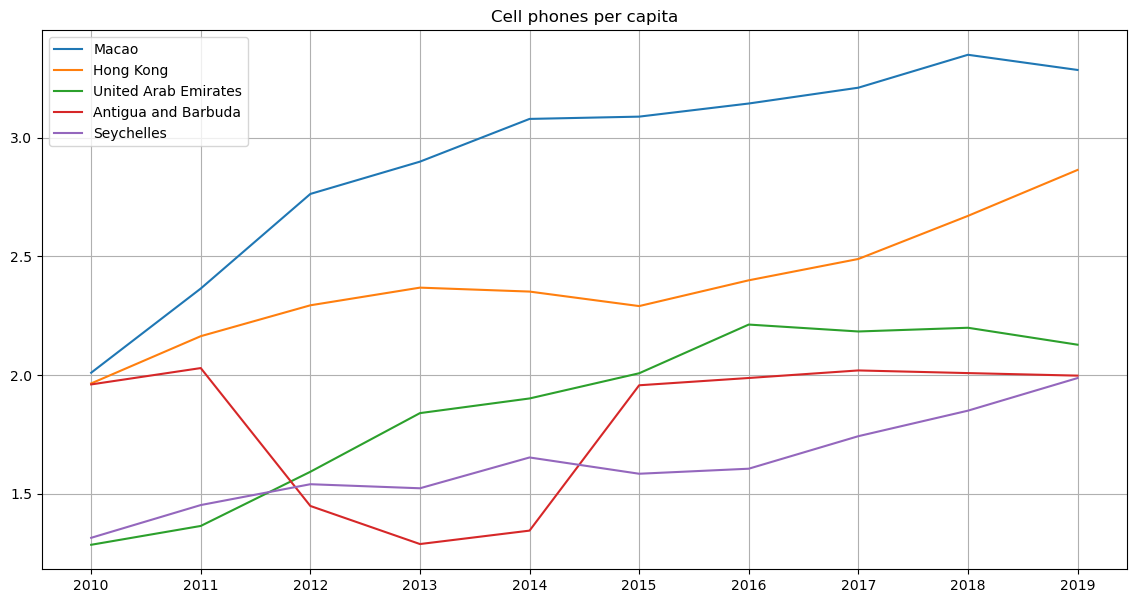

In [74]:
fig, axs = plt.subplots(figsize= (14,7))
axs.plot(x_years, y_M, label='Macao')
axs.plot(x_years, y_HK, label='Hong Kong')
axs.plot(x_years, y_UAE, label='United Arab Emirates')
axs.plot(x_years, y_AaB, label='Antigua and Barbuda')
axs.plot(x_years, y_S, label='Seychelles')
axs.set_title('Cell phones per capita')
axs.grid()
axs.legend();


## SQL



#### Read data from database


Connect to the database and look at the data

In [75]:
conn = sql.connect("./user_actions.db")
cursor = conn.cursor()

In [76]:
tables = list(cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"))
tables

[('user_actions',)]

In [77]:
query = """
SELECT * 
FROM user_actions
"""
cursor.execute(query)

for data in cursor.fetchone():    
    print(data)
    
user_actions_pd = pd.read_sql_query(query, conn)

34
user34
user34@email.com
signup
2015-02-04 14:38:47
None


In [78]:
user_actions_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    8040 non-null   int64 
 1   username   8040 non-null   object
 2   email      8040 non-null   object
 3   action     8040 non-null   object
 4   timestamp  8040 non-null   object
 5   day        0 non-null      object
dtypes: int64(1), object(5)
memory usage: 377.0+ KB



#### Users who have signedup


In [79]:
query = """
SELECT username 
FROM user_actions
WHERE action='signup'
"""

signedup_users = pd.read_sql_query(query, conn).sort_values(by='username')

In [80]:
signedup_users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 2 to 9
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  35 non-null     object
dtypes: object(1)
memory usage: 560.0+ bytes


In [81]:
signedup_users.style.hide(axis='index')

username
user1
user10
user11
user12
user13
user14
user15
user16
user17
user18



#### Number of log entries by user


In [82]:
query = """
SELECT user_id, username, count(*) 
FROM user_actions
WHERE action='login'
GROUP BY user_id
"""

n_log_entries_by_user_id = pd.read_sql_query(query, conn).sort_values(by='count(*)', ascending=False)

In [83]:
n_log_entries_by_user_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 12 to 31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   35 non-null     int64 
 1   username  35 non-null     object
 2   count(*)  35 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [84]:
n_log_entries_by_user_id.style.hide(axis='index')

user_id,username,count(*)
13,user13,464
6,user6,448
4,user4,425
35,user35,384
31,user31,381
16,user16,370
7,user7,358
17,user17,356
20,user20,353
11,user11,319



#### Users logged in, signed up same day


Create two views, for signup and login, with date from 'timestamp'.

In [85]:
query = """
CREATE VIEW login_view 
 (user_id, login_username, login_day)  
AS SELECT user_id, username, date(timestamp)
FROM user_actions
WHERE action='login' 
GROUP BY username, date(timestamp);
"""
cursor.execute(query);

In [86]:
query = """
CREATE VIEW signup_view 
  (user_id, signup_username, signup_day) 
AS SELECT user_id, username, date(timestamp)
FROM user_actions
WHERE action='signup' 
GROUP BY username, date(timestamp);
"""
cursor.execute(query);

In [87]:
views = list(cursor.execute("SELECT name FROM sqlite_master WHERE type='view';"))
views

[('login_view',), ('signup_view',)]

Now we can find the users who have signed up and logged in the same day.

In [88]:
query = """
SELECT signup_view.user_id, signup_username, signup_day
FROM signup_view, login_view
WHERE signup_username = login_username
      AND signup_day = login_day
GROUP BY login_username
"""
pd.read_sql_query(query, conn).sort_values(by='signup_day').style.hide(axis='index')

user_id,signup_username,signup_day
8,user8,2018-04-15
12,user12,2020-05-07
30,user30,2021-11-15
7,user7,2021-12-19
22,user22,2022-07-27
5,user5,2022-08-19
2,user2,2022-11-05
32,user32,2022-11-28


Clean up by dropping the views.

In [89]:
query = """
DROP VIEW login_view
"""
cursor.execute(query);

In [90]:
query = """
DROP VIEW signup_view
"""
cursor.execute(query);


## Regex



#### Read data from file


In [91]:
first_part = r"^\d{1,3}\." # split each line at the beginning number, which will not be saved

In [92]:
comments_pd = pd.read_table('comments.txt', sep=first_part, names=['id', 'comment'], engine='python')

In [93]:
comments_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       0 non-null      float64
 1   comment  100 non-null    object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [94]:
comments_pd.dtypes

id         float64
comment     object
dtype: object


##### Drop the 'id' column and convert the comments to strings


This will create a Series of strings.

In [95]:
string_comments = comments_pd['comment'].astype({'comment' : 'string'}, copy=True)

In [96]:
string_comments.info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: comment
Non-Null Count  Dtype 
--------------  ----- 
100 non-null    string
dtypes: string(1)
memory usage: 932.0 bytes


In [97]:
string_comments.head(6) # show the first six comments

0                  "Great post! #programming #tips"
1            "Enjoyed the article. #coding #python"
2               "Interesting insights. #tech #data"
3           "This is awesome! #programming #coding"
4             "Thanks for sharing. #data #analysis"
5     "I learned a lot. #programming #python #tips"
Name: comment, dtype: string


#### All hashtags


In [98]:
pattern_all_hashtags = r"#[\w]+"
pattern_all_hashtags

'#[\\w]+'


###### All hashtags are found in the first comment


In [99]:
tag_comment_0 = re.findall(pattern_all_hashtags, string_comments[0])
print(tag_comment_0)

['#programming', '#tips']



#### Both #programming and #python


In [100]:
pattern_both = r"#p[\w]+o[\w]*n[\w]*"
pattern_both

'#p[\\w]+o[\\w]*n[\\w]*'


###### In the second comment, #python is found, but not #programming


In [101]:
both_tag_comment_1 = re.findall(pattern_both, string_comments[1])
print(both_tag_comment_1)

['#python']



###### To find both #python and #programming, we have to search in the sixth comment


In [102]:
both_tag_comment_5 = re.findall(pattern_both, string_comments[5])
print(both_tag_comment_5)

['#programming', '#python']


We see that this pattern finds both #programming and #python, if they exist in a comment. It does not 
return all hashtags in a comment, e,g, not #tips in the sixth comment.


#### All unique hash tags


Read all comments to one string.

In [103]:
comments_file = open("comments.txt", "r", encoding="utf-8")

In [104]:
all_comments = comments_file.read()

This is probably possible to solve using backreferences and/or lookaround, but I have not yet found out how.

In [105]:
# all_comments

In [106]:
both_tag_comments = re.findall(pattern_both, all_comments)
# print(both_tag_comments)

In [107]:
all_tag_comments = re.findall(pattern_all_hashtags, all_comments)
# print(all_tag_comments)

In [108]:
pattern_all_unique_hashtags = r" "
# pattern_all_unique_hashtags

In [109]:
all_tag_unique_comments = re.findall(pattern_all_unique_hashtags, all_comments)
# print(all_tag_unique_comments)